In [19]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
#Import CSVs and convert each to a dataframe
cost_of_living = pd.read_csv('cost_of_living.csv')
ds_salaries = pd.read_csv('ds_salaries.csv')
levelsfyi_salaries = pd.read_csv('Levels_Fyi_Salary_Data.csv')
continents = pd.read_csv('Continents2.csv')
country_codes = pd.read_excel('country_codes.xlsx')

According to Investopedia.com, the cost of living index contains: food, shelter, transportation, energy, clothing, healthcare, and childcare. The cost of living plus rent index containts all the above, plus the cost of rent. This single index makes the Cost of Living, Rent, Groceries and Restaurant indicies redundant, so I'll remove them from the analysis and focus on the Cost of Living Plus Rent index going forward. 
Source: https://www.investopedia.com/ask/answers/100214/how-cost-living-index-calculated.asp#:~:text=A%20cost%20of%20living%20index%20compares%20the%20expenses%20from%20one,basic%20expenses%20rise%20over%20time.

In [3]:
# Creating a new data frame with city and cost of living plus rent
cost_of_living_plus_rent = cost_of_living[['City','Cost of Living Plus Rent Index']]

#Rename cost of living plus rent data frame to cost_data and the cost of living plus rent index column to cost_index for ease of manipulation going forward
cost_data = cost_of_living_plus_rent
cost_data = cost_data.rename(columns = {'Cost of Living Plus Rent Index': 'cost_index'})

#Sort cost_index column in descending order, add a column ranking them
cost_data = cost_data.sort_values('cost_index', ascending = False)
cost_data['Rank'] = cost_data.index + 1

#Ensure that the cost_index column are of a number type
cost_data['cost_index'].dtype

dtype('float64')

The code block below plots summary statistics using the dataframe we created

In [4]:
#Split the city column and create a country column, find the average cost_index by country and plot the summary statistics on a bar chart
cost_data['Country'] = cost_data['City'].str.split(',').str[-1].str.strip()
cost_data['City'] = cost_data['City'].str.split(',').str[0].str.strip()

In [5]:
cost_data

City  cost_index  Rank        Country
0         Hamilton      124.22     1        Bermuda
1           Zurich      102.19     2    Switzerland
3              Zug      101.87     4    Switzerland
21   San Francisco      100.72    22  United States
13        New York      100.00    14  United States
..             ...         ...   ...            ...
566          Jammu       13.08   567          India
571          Kabul       12.83   572    Afghanistan
573         Kanpur       12.73   574          India
576         Multan       11.30   577       Pakistan
577       Peshawar       10.97   578       Pakistan

[578 rows x 4 columns]

In [6]:
#Find the avergae cost index by country
cost_by_country = cost_data.groupby('Country')['cost_index'].mean().round(1).sort_values(ascending = False)

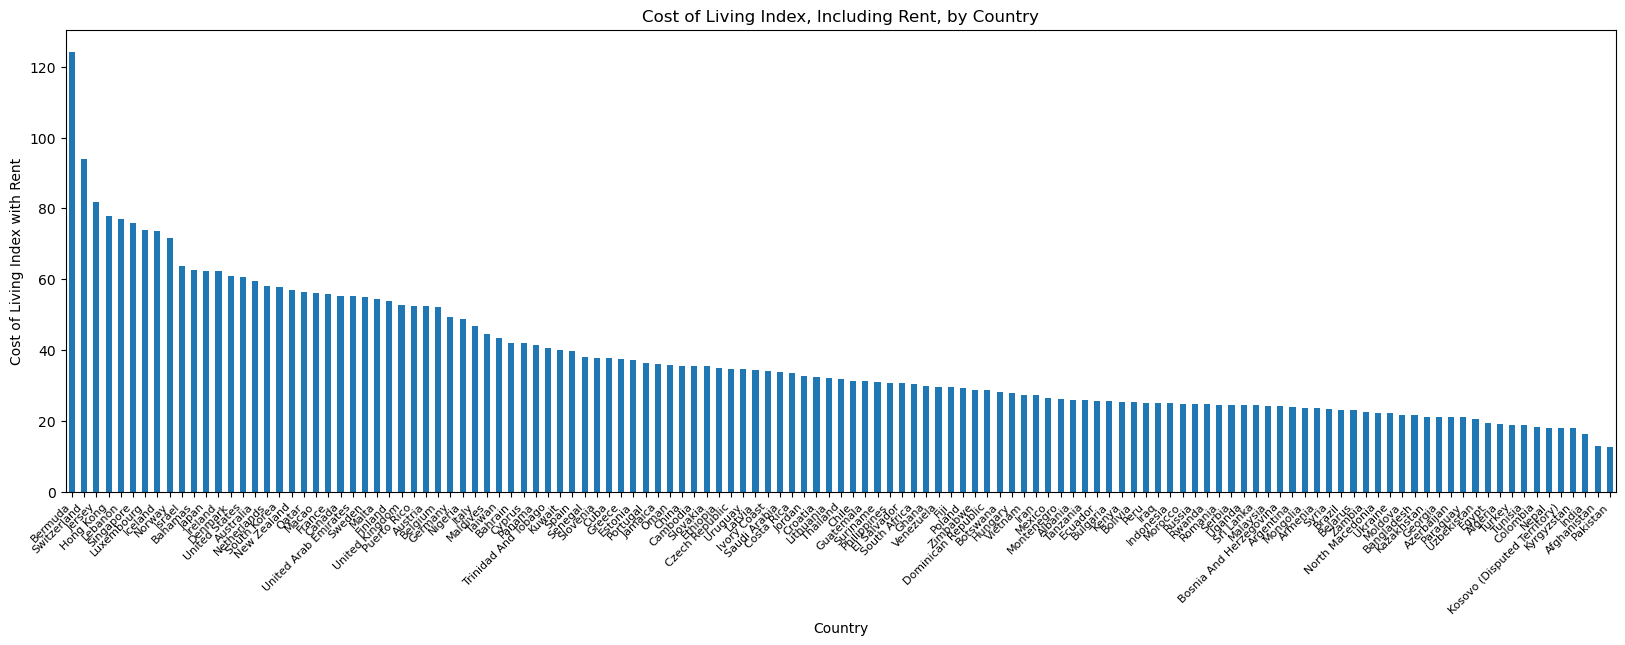

In [15]:
cost_by_country.plot(kind = 'bar', figsize=(20, 6))
plt.xticks(rotation=45, ha='right',fontsize=8)
plt.xlabel('Country')
plt.ylabel('Cost of Living Index with Rent')
plt.title('Cost of Living Index, Including Rent, by Country')
plt.show()